In [1]:
%pip install pandas numpy matplotlib scikit-learn

  Using cached pandas-2.3.3-cp310-cp310-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached numpy-2.2.6-cp310-cp310-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached matplotlib-3.10.7-cp310-cp310-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached scikit_learn-1.7.2-cp310-cp310-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp310-cp310-macosx_10_9_universal2.whl.metadata (112 kB)
  Using cached kiwisolver-1.4.9-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-12.0.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (8.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
  Using cached scipy-1.15.3-cp310-cp310-macosx_14_0_arm64.whl.metadata (61

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('telco-churn.csv')

X = data.drop(columns=['Churn'])
y = data['Churn']

print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
X.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from typing import Any, List, Dict, Tuple, Union
from sklearn.metrics import f1_score, accuracy_score

In [4]:
X.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,zprior,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
0,948,2,48,89.8128,0,0,0,100,0,0,1,0,0,0,0,1,0,1,0,422,477,566,324
1,1002,3,61,49.4424,0,0,0,90,0,1,1,895,0,0,1,3,0,1,0,162,218,392,564
2,961,3,45,88.4520,0,1,1,90,0,1,1,707,0,1,1,3,0,1,1,326,274,2063,1893
3,1166,3,47,85.2768,0,1,0,100,0,1,1,1399,0,1,1,3,0,1,0,287,394,1590,966
4,1090,0,43,66.6792,0,1,0,100,0,1,1,1352,0,1,1,3,0,0,0,504,353,870,782


In [5]:
y = y.squeeze()

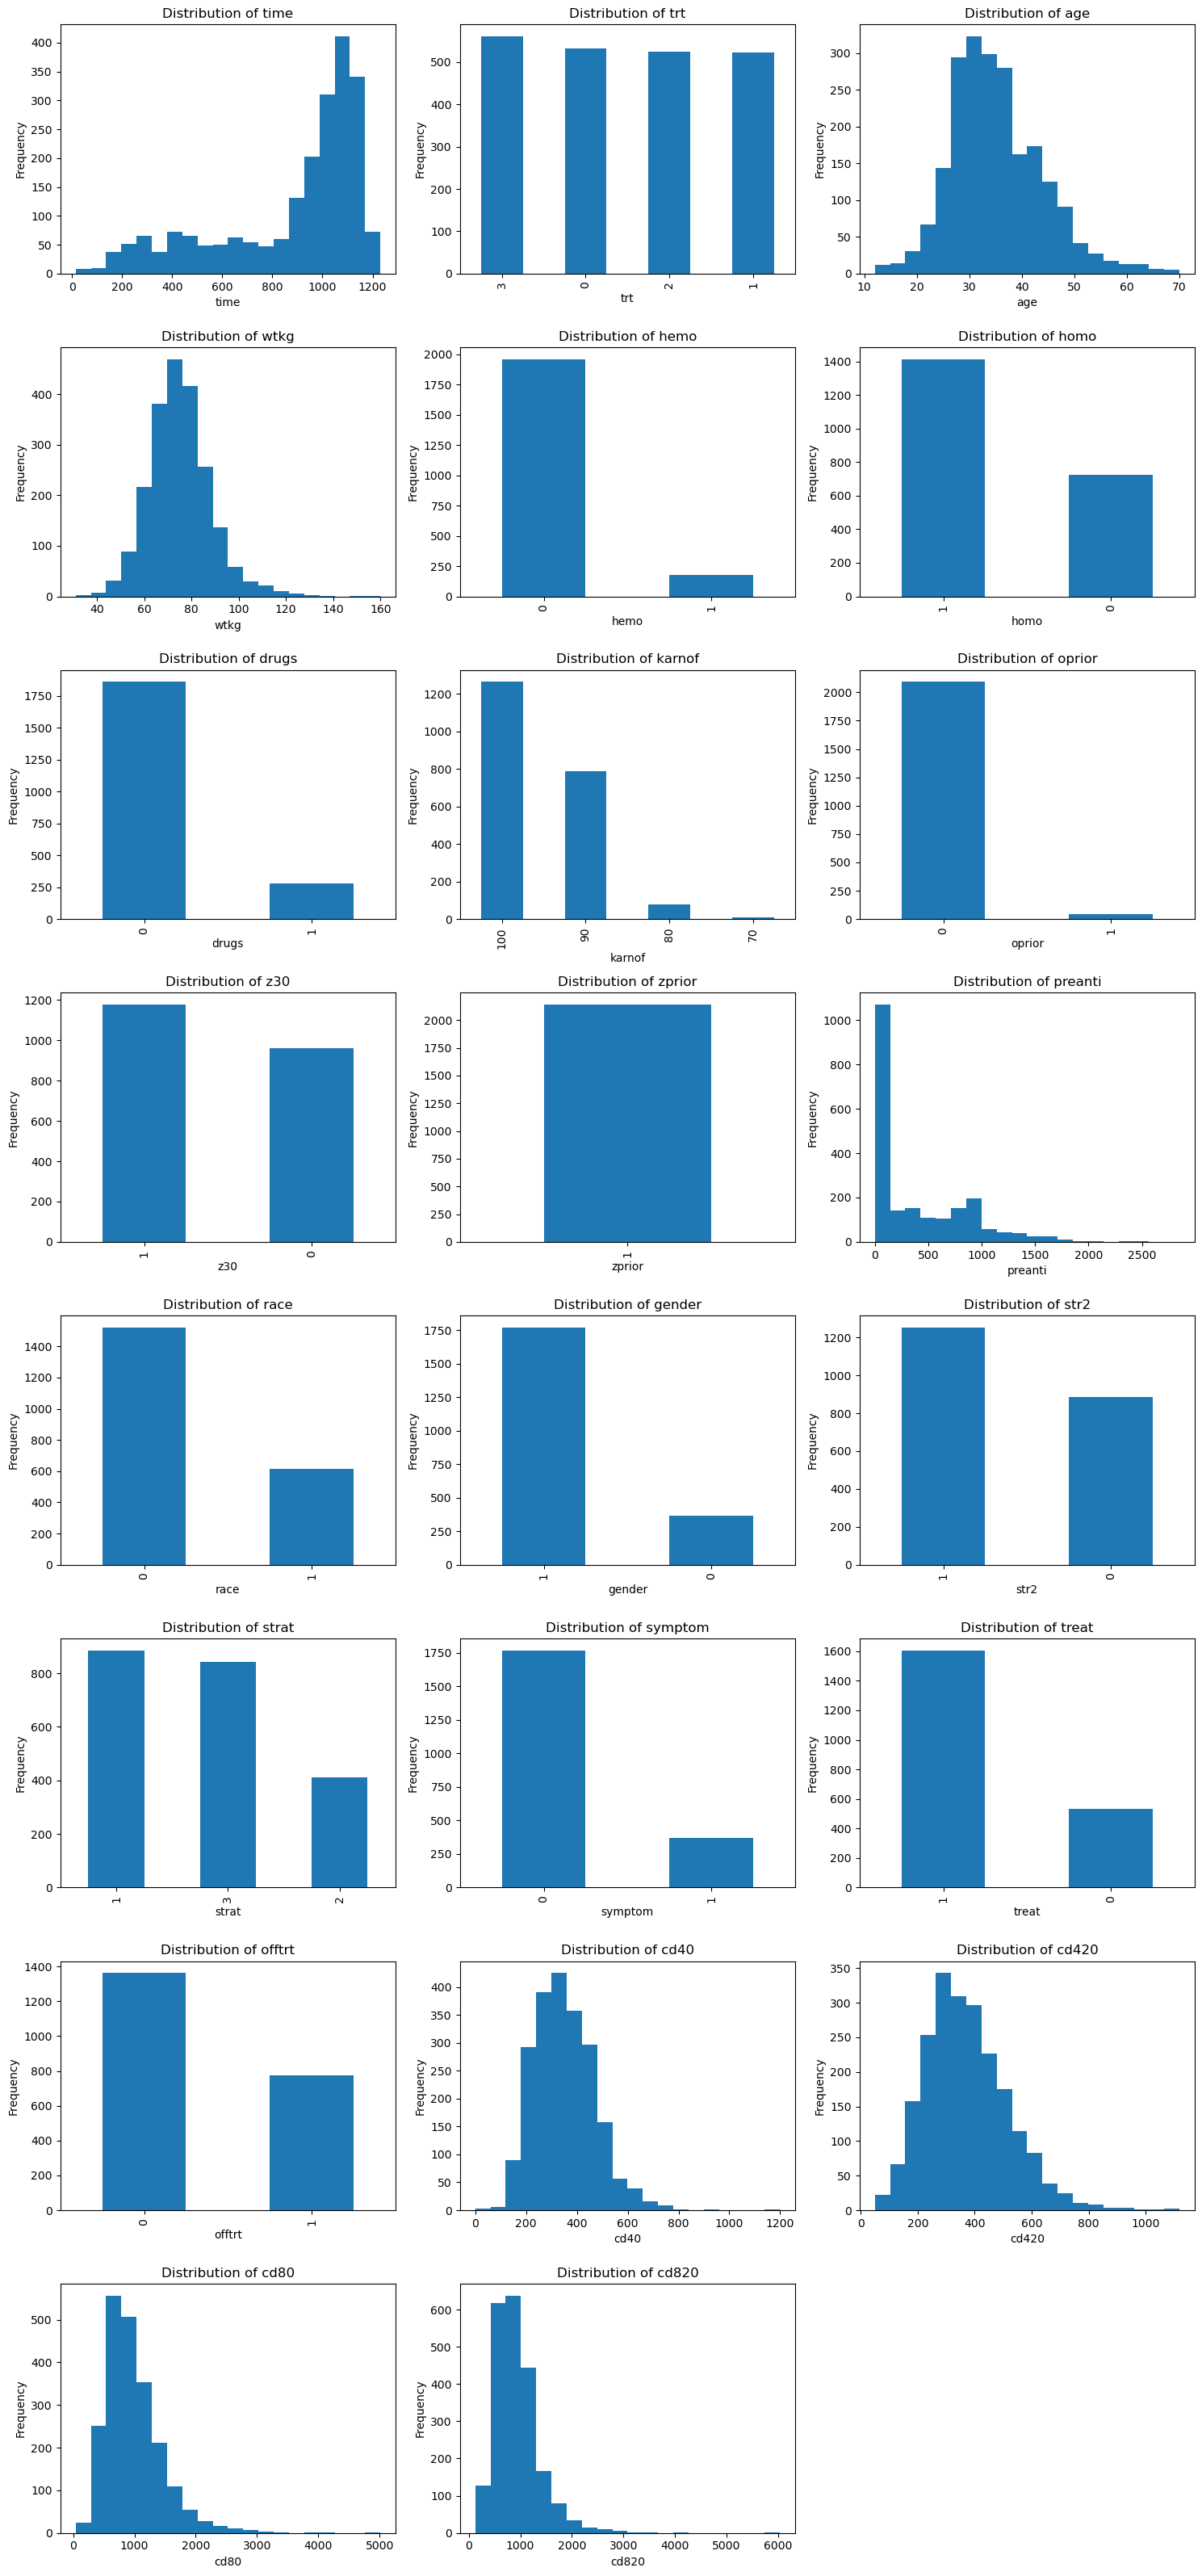

In [7]:
num_columns = len(X.columns)
cols = 3  # Number of columns in the grid (adjust as needed)
rows = math.ceil(num_columns / cols)

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))  # Adjust figure size as needed
axes = axes.flatten()  # Flatten to easily iterate over axes

for i, column in enumerate(X.columns):
    ax = axes[i]
    if X[column].dtype == 'object' or len(X[column].unique()) < 20:
        # For categorical or discrete features, use a bar plot
        X[column].value_counts().plot(kind='bar', ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
    else:
        # For continuous features, use a histogram
        X[column].plot(kind='hist', bins=20, ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout for readability
plt.show()

In [8]:
y.value_counts()

cid
0    1618
1     521
Name: count, dtype: int64

In [9]:
y.value_counts() / len(y)

cid
0    0.756428
1    0.243572
Name: count, dtype: float64

/tmp/ipykernel_46345/1737992026.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=X, x=X.columns[i-1],
/tmp/ipykernel_46345/1737992026.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=X, x=X.columns[i-1],


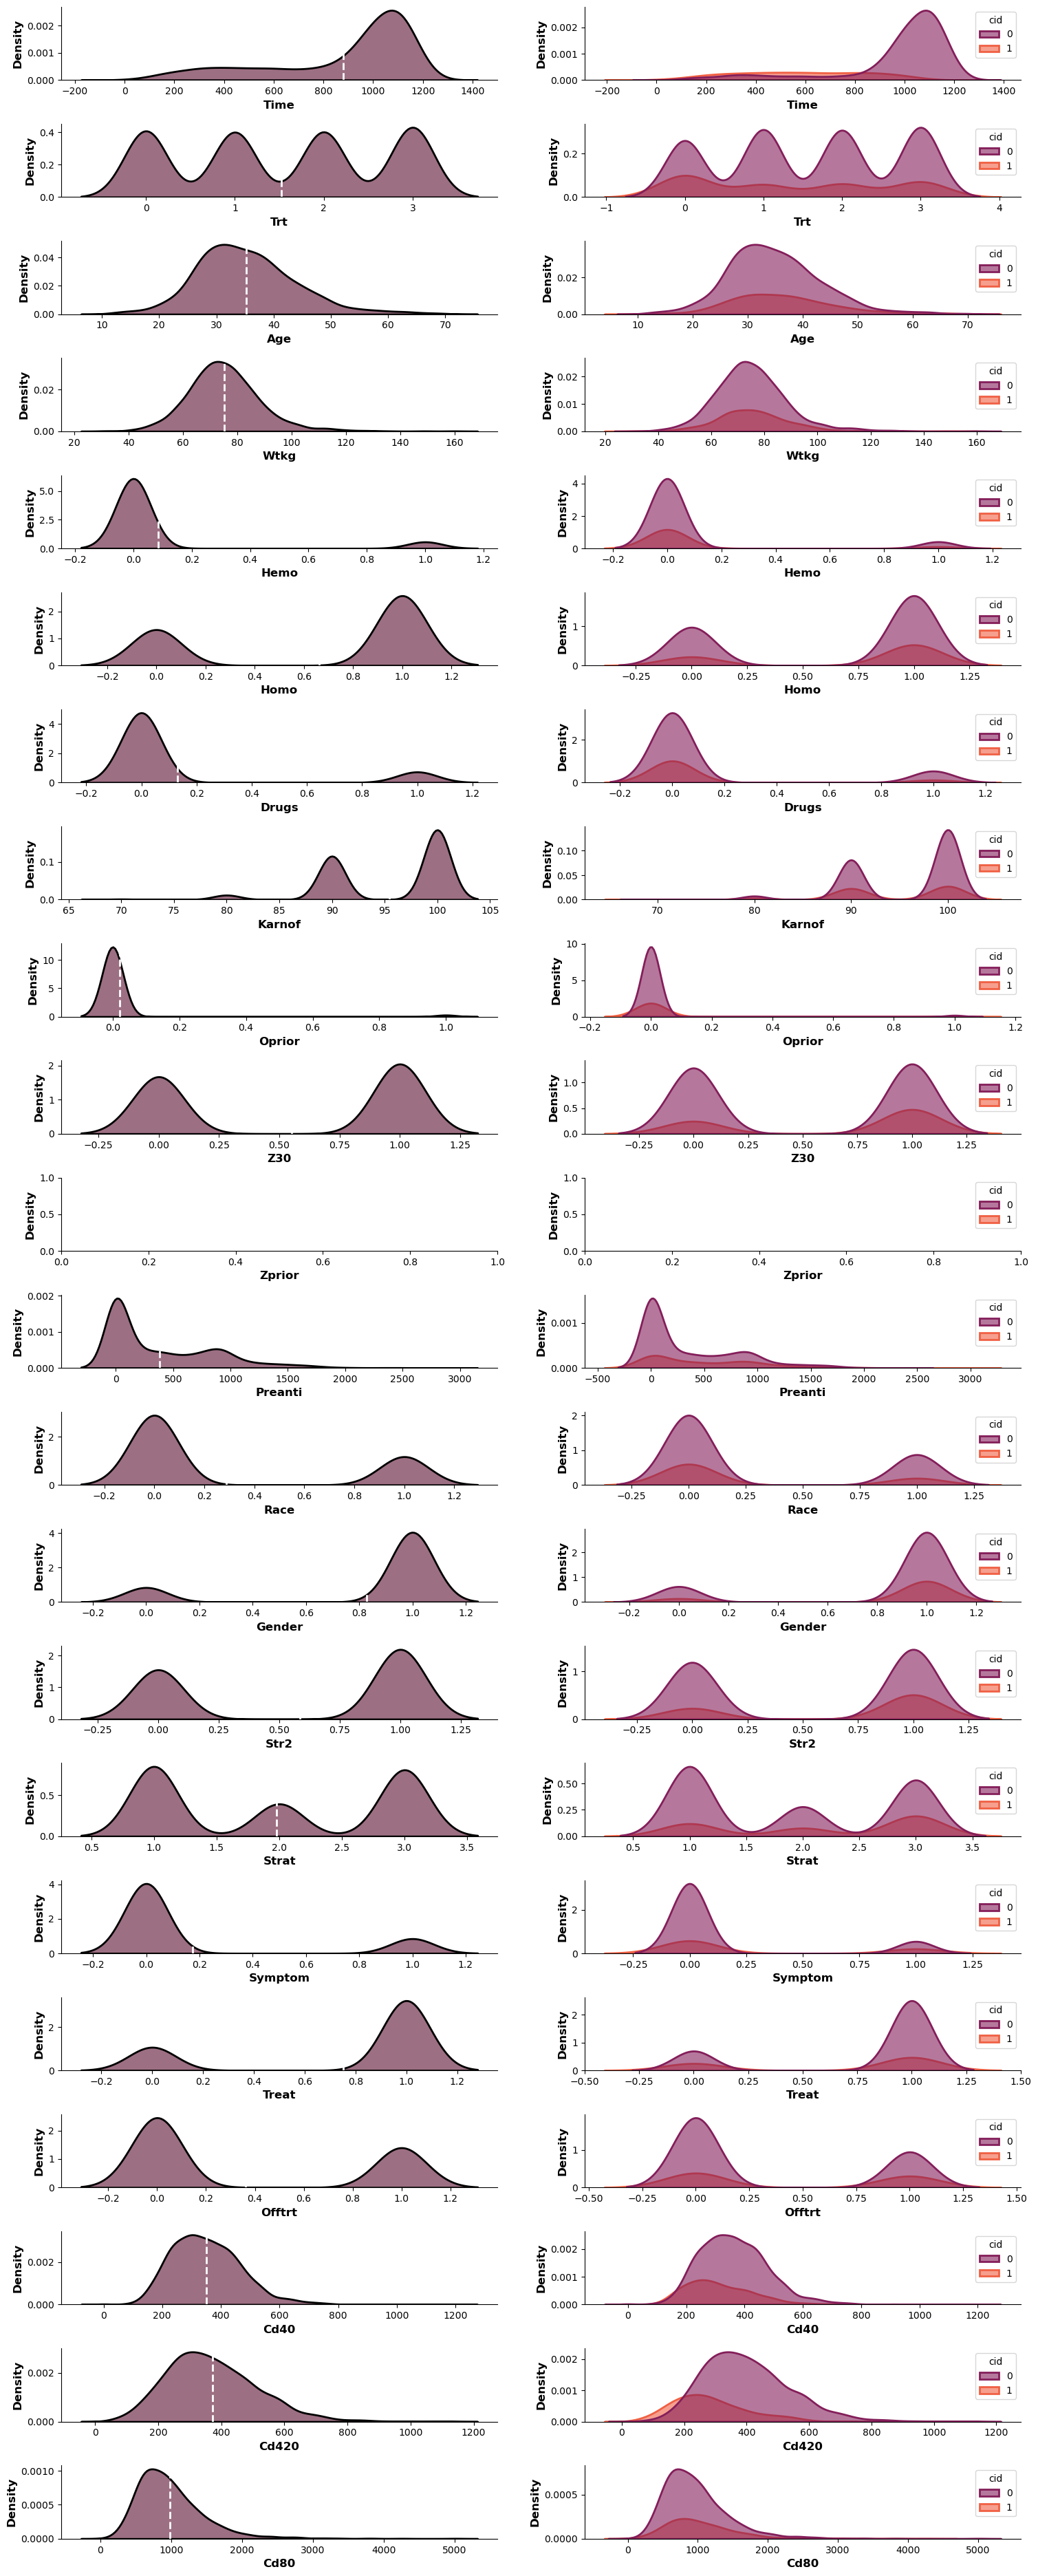

In [10]:

plotIndex = 1
plt.figure(figsize=(18,50))
for i in range(1, len(X.columns)):
    plt.subplot(len(X.columns), 2, plotIndex)
    sns.kdeplot(data=X, x=X.columns[i-1], 
                fill=True, linewidth=2, color='#5c1031', alpha=0.6, edgecolor='k')
    plt.axvline(X[X.columns[i-1]].mean(), color='white', linestyle='--', linewidth=2)
    plt.xlabel(xlabel=X.columns[i-1].title(), fontsize=12, weight='bold')
    plt.ylabel(ylabel='Density', fontsize=12, weight='bold')
    sns.despine()

    plt.subplot(len(X.columns), 2, plotIndex+1)
    sns.kdeplot(data=X, x=X.columns[i-1], 
                fill=True, hue=y, linewidth=2, palette='rocket', alpha=0.6)
    plt.xlabel(xlabel=X.columns[i-1].title(), fontsize=12, weight='bold')
    plt.ylabel(ylabel='Density', fontsize=12, weight='bold')
    sns.despine()

    
    plotIndex += 2
plt.subplots_adjust(hspace=0.6)    
plt.show()

/home/toretto/miniconda3/envs/imckd/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/toretto/miniconda3/envs/imckd/lib/python3.9/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


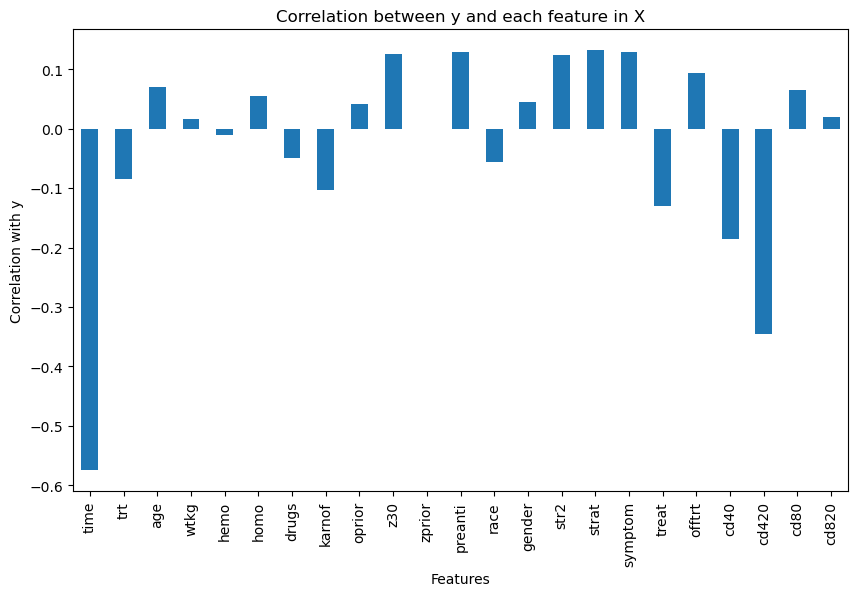

In [11]:
correlations = X.corrwith(y)
correlations.plot(kind='bar', figsize=(10, 6))
plt.title('Correlation between y and each feature in X')
plt.xlabel('Features')
plt.ylabel('Correlation with y')
plt.show()

In [12]:
X['time'][y == 1].min(), X['time'][y == 1].max()

(14, 1073)

In [13]:
X['time'][y == 0].min(), X['time'][y == 0].max()

(62, 1231)

In [14]:
len(X[X['time'] < 1073]), len(X[X['time'] > 1073])

(1445, 689)

# Data Preprocessing

In [15]:
# Remove all patients who dropped out (censored) before 1073 days
condition = (y == 0) & (X['time'] < 1073)
X = X[~condition]
y = y[~condition]

In [16]:
# Remove columns: time, zprior
X = X.drop(['time', 'zprior'], axis='columns')

In [17]:
X

,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
1,3,61,49.4424,0,0,0,90,0,1,895,0,0,1,3,0,1,0,162,218,392,564
3,3,47,85.2768,0,1,0,100,0,1,1399,0,1,1,3,0,1,0,287,394,1590,966
4,0,43,66.6792,0,1,0,100,0,1,1352,0,1,1,3,0,0,0,504,353,870,782
5,1,46,88.9056,0,1,1,100,0,1,1181,0,1,1,3,0,1,0,235,339,860,1060
6,0,31,73.0296,0,1,0,100,0,1,930,0,1,1,3,0,0,0,244,225,708,699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,2,25,78.0000,1,0,0,100,0,1,905,0,1,1,3,0,1,0,468,594,636,554
2133,2,39,64.8648,1,0,0,90,0,1,1042,0,1,1,3,0,1,1,378,401,504,367
2134,3,21,53.2980,1,0,0,100,0,1,842,0,1,1,3,0,1,1,152,109,561,720
2136,2,53,69.8544,1,1,0,90,0,1,753,1,1,1,3,0,1,0,419,364,1391,1041


In [18]:
# is there duplicated rows?
X.duplicated().sum()

0

# Splitting the data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scaling (binarization): ONLY for non-numerical features

In [20]:
X.columns

Index(['trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof', 'oprior',
       'z30', 'preanti', 'race', 'gender', 'str2', 'strat', 'symptom', 'treat',
       'offtrt', 'cd40', 'cd420', 'cd80', 'cd820'],
      dtype='object')

In [21]:
X_binarized = pd.DataFrame(index=X.index)

#### 1. trt

treatment indicator (0 = ZDV only;
                     1 = ZDV + ddI,
                     2 = ZDV + Zal,
                     3 = ddI only)

In [22]:
trt_zdv = X['trt'].isin([0, 1, 2])    # True when 'trt' is 0, 1, or 2
trt_ddi = X['trt'].isin([1, 3])       # True when 'trt' is 1 or 3
trt_zal = X['trt'] == 2               # True when 'trt' is 2

In [23]:
X_binarized['trt_zdv'] = trt_zdv
X_binarized['trt_ddi'] = trt_ddi
X_binarized['trt_zal'] = trt_zal

#### 4. hemo

Hemophilia is a rare, genetic blood disorder that happens when your blood doesn't clot and make your bleeding slow down or stop.
Гемофилия

In [24]:
X_binarized['hemo'] = X['hemo'] == 1

#### 5. homo

In [25]:
X_binarized['homo'] = X['homo'] == 1

#### 6. drugs

In [26]:
X_binarized['drugs'] = X['drugs'] == 1
X_binarized['not_drugs'] = X['drugs'] == 0

#### 8. oprior

Non-ZDV Antiretroviral Therapy Pre-175 (oprior): Binary indicator of non-ZDV antiretroviral therapy pre-Study 175 (0 = no, 1 = yes).

In [27]:
X_binarized['oprior'] = X['oprior'] == 1
X_binarized['not_oprior'] = X['oprior'] == 0

#### 9. z30

ZDV in the 30 Days Prior to 175 (z30): Binary indicator of ZDV use in the 30 days prior to Study 175 (0 = no, 1 = yes).

In [28]:
X_binarized['z30'] = X['z30'] == 1
X_binarized['not_z30'] = X['z30'] == 0

#### 11. race


In [29]:
X_binarized['white'] = X['race'] == 0
X_binarized['not_white'] = X['race'] == 1

#### 12. gender

In [30]:
X_binarized['male'] = X['gender'] == 1
X_binarized['female'] = X['gender'] == 0

#### 13. str2

Antiretroviral History (str2): Binary indicator of antiretroviral history (0 = naive, 1 = experienced).

In [31]:
X_binarized['str2'] = X['str2'] == 1
X_binarized['not_str2'] = X['str2'] == 0

#### 15. symptom

symptomatic indicator (0=asymp, 1=symp)

In [32]:
X_binarized['symptom'] = X['symptom'] == 1

#### 16. treat

treatment indicator (0=ZDV only, 1=others) ???

In [33]:
X['treat'].value_counts()

treat
1    891
0    323
Name: count, dtype: int64

In [34]:
X['trt'].value_counts()

trt
0    323
3    305
1    296
2    290
Name: count, dtype: int64

Information is already captured, so delete the feature

#### 17. offtrt

Off-Treatment Indicator (offtrt): Binary indicator of being off-treatment before 96+/-5 weeks (0 = no, 1 = yes).

The Off-Treatment Indicator (offtrt) specifically refers to whether a patient went off treatment within the study period, before reaching 96 weeks (plus or minus a 5-week margin) from the study's start. Here’s a clarification:

0 (no): The patient remained on treatment continuously for at least 96 weeks (within a margin of 5 weeks).
1 (yes): The patient stopped treatment early, meaning they went off treatment before reaching the 96-week timepoint (or within a margin of 5 weeks before or after).

In [35]:
X_train['offtrt'].value_counts()

offtrt
0    729
1    242
Name: count, dtype: int64

In [36]:
X_binarized['offtrt'] = X['offtrt'] == 1
X_binarized['not_offtrt'] = X['offtrt'] == 0

# Binarization for non-numerical features is Complete, Re-split:

In [37]:
X_binarized.shape

(1214, 20)

# Add the numerical features without any change

In [51]:
numerical_features = ['age', 'wtkg', 'karnof', 'preanti', 'strat', 'cd40', 'cd420', 'cd80', 'cd820']

In [52]:
X_binarized[numerical_features] = X[numerical_features]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_binarized, y, test_size=0.2, stratify=y, random_state=42)

In [54]:
X_train.head()

,trt_zdv,trt_ddi,trt_zal,hemo,homo,drugs,not_drugs,oprior,not_oprior,z30,not_z30,white,not_white,male,female,str2,not_str2,symptom,offtrt,not_offtrt,age,wtkg,karnof,preanti,strat,cd40,cd420,cd80,cd820
1466,True,True,False,False,True,False,True,False,True,True,False,True,False,False,True,True,False,False,False,True,24,67.9000,100,118,2,310,437,1032,874
1632,True,False,False,False,False,False,True,False,True,True,False,True,False,False,True,True,False,True,False,True,24,66.2256,100,493,3,450,300,884,799
1215,False,True,False,False,True,False,True,False,True,True,False,False,True,True,False,True,False,True,True,False,29,73.7100,90,33,2,186,131,529,608
2063,True,True,False,True,False,False,True,False,True,False,True,True,False,True,False,False,True,False,False,True,20,71.9000,100,0,1,290,176,841,897
535,True,False,True,False,True,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,35,66.2256,90,437,3,180,234,744,676


# Lazy FCA baseline with IPS:

In [136]:
class LazyClassifierFCA:
    def __init__(self):
        self.X_train = None
        self.y_train = None

    def fit(self, X_train: pd.DataFrame, y_train: pd.Series) -> None:
        self.X_train = X_train
        self.y_train = y_train
        
    def classify_sample(self, sample: pd.Series) -> Any:
        # Split X_train into positive and negative classes
        X_train_positive = self.X_train[y_train == 1]
        X_train_negative = self.X_train[y_train == 0]
        
        positive_classifiers = 0
        negative_classifiers = 0

        # Split the each part into binary and numerical
        binary_X_train_positive = X_train_positive.select_dtypes(include='bool')
        numerical_X_train_positive = X_train_positive.select_dtypes(exclude='bool')
        binary_X_train_negative = X_train_negative.select_dtypes(include='bool')
        numerical_X_train_negative = X_train_negative.select_dtypes(exclude='bool')
        
        
        def find_number_of_positive_and_negative_matches(binary_intersection, numerical_intervals):
            # Binary condition: Matches the binary intersection
            binary_positive_match = (binary_X_train_positive | ~binary_intersection).all(axis=1)
            binary_negative_match = (binary_X_train_negative | ~binary_intersection).all(axis=1)
    
            # Numerical condition: Lies within the intervals
            numerical_positive_match = numerical_X_train_positive.apply(
                lambda row: all(
                    interval[0] <= value <= interval[1] for value, interval in zip(row, numerical_intervals)
                ),
                axis=1
            )
            numerical_negative_match = numerical_X_train_negative.apply(
                lambda row: all(
                    interval[0] <= value <= interval[1] for value, interval in zip(row, numerical_intervals)
                ),
                axis=1
            )
            print(f"pos_supp: \n {list(X_train_positive[(binary_positive_match & numerical_positive_match)].index)}")
            print(f"neg_supp: \n {list(X_train_negative[(binary_negative_match & numerical_negative_match)].index)}")
            # Combine binary and numerical conditions
            num_positive = (binary_positive_match & numerical_positive_match).sum()
            num_negative = (binary_negative_match & numerical_negative_match).sum()
            return num_positive, num_negative
        
        # Function to check if intersection with a train sample is a positive classifier
        def is_positive_classifier(binary_intersection, numerical_intervals):
            num_positive, num_negative = find_number_of_positive_and_negative_matches(binary_intersection, numerical_intervals)
            return num_negative == 0 and num_positive > 1
        
        # Function to check if intersection is a negative classifier
        def is_negative_classifier(binary_intersection, numerical_intervals):
            num_positive, num_negative = find_number_of_positive_and_negative_matches(binary_intersection, numerical_intervals)
            return num_positive == 0 and num_negative > 1
        
        # Check for positive classifiers by intersecting sample with each positive object
        for _, pos_sample in X_train_positive.iterrows():
            # Binary intersection: AND operation
            binary_intersection = sample[binary_X_train_positive.columns] & pos_sample[binary_X_train_positive.columns]
            
           eric # Numerical intersection: Interval
            numal_intersection = [
                (min(sample[col], pos_sample[col]), max(sample[col], pos_sample[col]))
                for col in numerical_X_train_positive.columns
            ]
            print({sample.name}, {pos_sample.name})
            # print(f"{sample=}")
            # print(f"{pos_sample=}")
            # print(f"{binary_intersection=} \n {numerical_intersection=}")
            
            # Combine intersections and check
            if is_positive_classifier(binary_intersection, numerical_intersection):
                positive_classifiers += 1
        
        # Check for negative classifiers by intersecting sample with each negative object
        for _, neg_sample in X_train_negative.iterrows():
            # Binary intersection: AND operation
            binary_intersection = sample[binary_X_train_negative.columns] & neg_sample[binary_X_train_negative.columns]
            
            # Numerical intersection: Interval
            numerical_intersection = [
                (min(sample[col], neg_sample[col]), max(sample[col], neg_sample[col]))
                for col in numerical_X_train_negative.columns
            ]
            
            # Combine intersections and check
            if is_negative_classifier(binary_intersection, numerical_intersection):
                negative_classifiers += 1

        # Determine the class based on the number of classifiers
        if positive_classifiers > negative_classifiers:
            print(f"sample {sample.name} is classified as 1, {positive_classifiers=}, {negative_classifiers=}")
            return 1  # Predict positive
            
        elif negative_classifiers > positive_classifiers:
            print(f"sample {sample.name} is classified as 0, {positive_classifiers=}, {negative_classifiers=}")
            return 0  # Predict negative

        else:
            # If equal, you can decide on a rule, like defaulting to 0 or 1, or returning 'undetermined'
            print(f"sample {sample.name} is classified as 1, default, {positive_classifiers=}, {negative_classifiers=}")
        
            return 1  # or 0, depending on the choice


    def predict(self, X_test: pd.DataFrame) -> List[Any]:
        # List to store predictions for each test sample
        predictions = []
        
        # Iterate through each sample in X_test
        for _, sample in X_test.iterrows():
            # Classify the sample and append the result to predictions
            prediction = self.classify_sample(sample)
            predictions.append(prediction)
        
        return predictions

In [137]:
sample = X_test.iloc[1]
y.iloc[1]

0

In [138]:
len(X_train[y_train == 1]), len(X_train[y_train == 0])

(417, 554)

In [139]:
pos_X_train = X_train[y_train == 1]
neg_X_train = X_train[y_train == 0]
len(pos_X_train), len(neg_X_train)

(417, 554)

In [140]:
classifier = LazyClassifierFCA()
classifier.fit(X_train, y_train)

In [141]:
classifier.classify_sample(sample)

{35} {1632}
pos_supp: 
 [1632]
neg_supp: 
 []
{35} {1215}
pos_supp: 
 [1215, 1307]
neg_supp: 
 []
{35} {2063}
pos_supp: 
 [2063, 924]
neg_supp: 
 []
{35} {458}
pos_supp: 
 [458]
neg_supp: 
 []
{35} {1127}
pos_supp: 
 [1127]
neg_supp: 
 []
{35} {1458}
pos_supp: 
 [1458]
neg_supp: 
 []
{35} {550}
pos_supp: 
 [550]
neg_supp: 
 []
{35} {2072}
pos_supp: 
 [2072, 662, 1294, 1009, 2009, 88]
neg_supp: 
 [1008, 740, 430, 700]
{35} {1714}
pos_supp: 
 [1714, 592]
neg_supp: 
 []
{35} {829}
pos_supp: 
 [829]
neg_supp: 
 []
{35} {1092}
pos_supp: 
 [1092]
neg_supp: 
 []
{35} {188}
pos_supp: 
 [188]
neg_supp: 
 []
{35} {1067}
pos_supp: 
 [1067, 719, 648, 1629]
neg_supp: 
 []
{35} {745}
pos_supp: 
 [745, 704, 1590]
neg_supp: 
 [612, 659]
{35} {955}
pos_supp: 
 [955]
neg_supp: 
 []
{35} {1861}
pos_supp: 
 [1861]
neg_supp: 
 []
{35} {25}
pos_supp: 
 [25]
neg_supp: 
 []
{35} {69}
pos_supp: 
 [69, 751]
neg_supp: 
 []
{35} {525}
pos_supp: 
 [525]
neg_supp: 
 []
{35} {364}
pos_supp: 
 [364]
neg_supp: 
 []
{3

0

In [123]:
X_train.loc[1632]

trt_zdv          True
trt_ddi         False
trt_zal         False
hemo            False
homo            False
drugs           False
not_drugs        True
oprior          False
not_oprior       True
z30              True
not_z30         False
white            True
not_white       False
male            False
female           True
str2             True
not_str2        False
symptom          True
offtrt          False
not_offtrt       True
age                24
wtkg          66.2256
karnof            100
preanti           493
strat               3
cd40              450
cd420             300
cd80              884
cd820             799
Name: 1632, dtype: object

In [77]:
y_pred = classifier.predict(X_test)

sample 152 is classified as 0, positive_classifiers=42, negative_classifiers=60
sample 35 is classified as 0, positive_classifiers=32, negative_classifiers=48
sample 1304 is classified as 0, positive_classifiers=11, negative_classifiers=43
sample 1140 is classified as 0, positive_classifiers=20, negative_classifiers=44
sample 738 is classified as 0, positive_classifiers=12, negative_classifiers=55
sample 1020 is classified as 1, positive_classifiers=35, negative_classifiers=24
sample 1075 is classified as 0, positive_classifiers=12, negative_classifiers=44
sample 1582 is classified as 0, positive_classifiers=13, negative_classifiers=71
sample 819 is classified as 0, positive_classifiers=12, negative_classifiers=23
sample 354 is classified as 0, positive_classifiers=17, negative_classifiers=39
sample 134 is classified as 0, positive_classifiers=7, negative_classifiers=97
sample 1118 is classified as 0, positive_classifiers=3, negative_classifiers=102
sample 371 is classified as 0, posit

In [78]:
f1_score(y_test, y_pred), accuracy_score(y_test, y_pred)

(0.09090909090909091, 0.588477366255144)